<a href="https://colab.research.google.com/github/Guilherm0/Clustering/blob/main/HierarchicalClusteringPratica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

In [ ]:
%%capture
%pip install kmodes

In [ ]:
# Data wrangling
import numpy as np
import pandas as pd

# Dataviz
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer, InterclusterDistance, kelbow_visualizer, silhouette_visualizer

## -- Machine learning -- ##
from sklearn import datasets
from sklearn.cluster import estimate_bandwidth
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

from kmodes.kmodes import KModes            # clustering categorical data
from kmodes.kprototypes import KPrototypes  # clustering mixed data

# Didatic purposes
import string
from ipywidgets import interact

In [ ]:
# https://matplotlib.org/stable/tutorials/introductory/customizing.html
sns.set_theme(
    context='talk',
    style='ticks',
    font_scale=.8,
    palette='tab10',
    rc={
        'figure.figsize': (12,8),
        'axes.grid': True,
        'grid.alpha': .2,
        'axes.titlesize': 'x-large',
        'axes.titleweight': 'bold',
        'axes.titlepad': 20,
    }
)

scatter_kwargs = dict(palette='viridis', alpha=0.8, linewidth=0)

# Hierarchical clustering

In [ ]:
# Simulate clusters
X,y = datasets.make_blobs(n_samples=80, n_features=2, centers=4, cluster_std=.6, random_state=0)
df = pd.DataFrame(X, columns=list(string.ascii_uppercase[:X.shape[1]]))
df.head()

,A,B
0,-1.710205,8.159010
1,-0.397014,2.109227
2,-1.148252,8.216479
3,2.334665,-0.024083
4,-1.347961,3.713714


In [ ]:
# Hierarchical clustering with sklearn
model = AgglomerativeClustering(n_clusters=4)
labels = model.fit_predict(X)

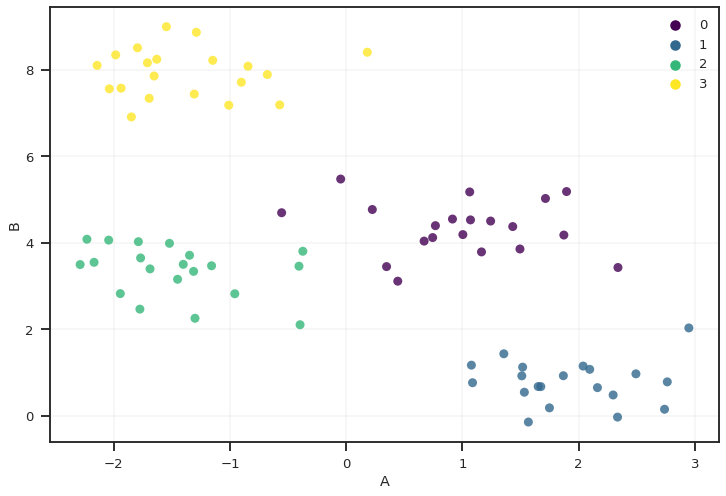

In [ ]:
sns.scatterplot(data=df, x='A', y='B', hue=y, **scatter_kwargs);

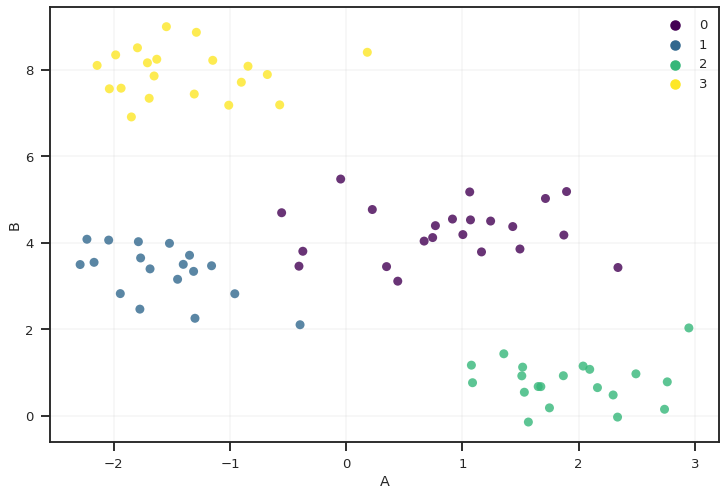

In [ ]:
sns.scatterplot(data=df, x='A', y='B', hue=labels, **scatter_kwargs);

In [ ]:
# Hierarchical clustering with scipy

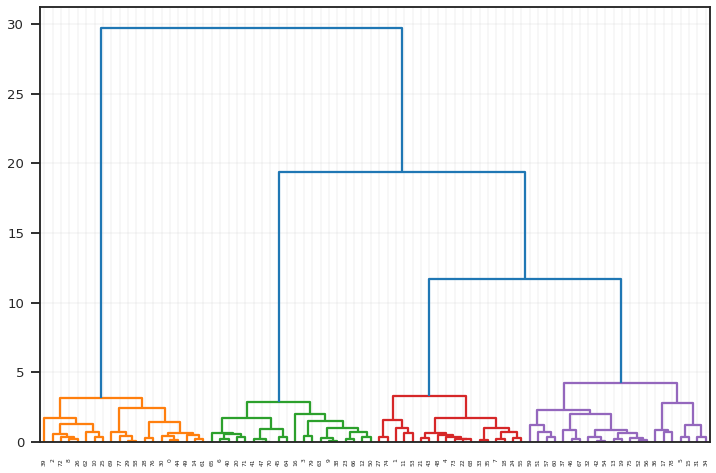

In [ ]:
Z = linkage(df, method='ward')
dendrogram_dict = dendrogram(Z, color_threshold=10)
plt.show()

In [ ]:
fcluster(Z, 4, criterion='maxclust')

array([1, 3, 1, 2, 3, 4, 2, 3, 1, 2, 1, 3, 2, 4, 1, 4, 2, 4, 3, 4, 2, 3,
       3, 2, 3, 1, 1, 3, 1, 1, 1, 4, 4, 3, 4, 3, 4, 4, 2, 1, 2, 2, 4, 3,
       1, 2, 4, 2, 3, 1, 2, 4, 4, 3, 4, 3, 4, 4, 1, 4, 4, 1, 1, 2, 2, 2,
       2, 4, 3, 1, 2, 2, 1, 3, 3, 4, 1, 1, 4, 2], dtype=int32)

In [ ]:
@interact(method=['single','complete','centroid', 'ward'])
def plot_dendrogram(method):
  Z = linkage(df, method=method)
  dendrogram_dict = dendrogram(Z)
  plt.show()

interactive(children=(Dropdown(description='method', options=('single', 'complete', 'centroid', 'ward'), value…